## Classfying Cancer Cell data
***




### Our Data Set








***
### Library and Data Retreival

In [1]:
#Importing The Relevant Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
#Loading the Downloaded Dataset
data = pd.read_csv('data.csv')

The Data set holds 33 features and 569 records of cell tested 

###  EDA and Feature Preperation

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
#Extracting the Sampled for Positive and Negative testing 
TestSelecition = [842302,8510824]
testdata = data.iloc[np.where(data.id.isin(TestSelecition))]
testdata.drop(['Unnamed: 32','id'], axis = 1,inplace=True)


D:\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [5]:
for i in testdata:
    data.drop(data.loc[data['id'] == i].index, inplace =True)

In [6]:
testdata.drop("diagnosis", inplace=True, axis=1)

In [7]:
testdata

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.990,10.38,122.80,1001.0,0.1184,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890
21,9.504,12.44,60.34,273.9,0.1024,0.06492,0.02956,0.02076,0.1815,0.06905,...,10.23,15.66,65.13,314.9,0.1324,0.1148,0.08867,0.06227,0.2450,0.07773


In [8]:
#Droping Columns Not relevant to our implemention
data.drop(['Unnamed: 32','id'], axis = 1,inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [10]:
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

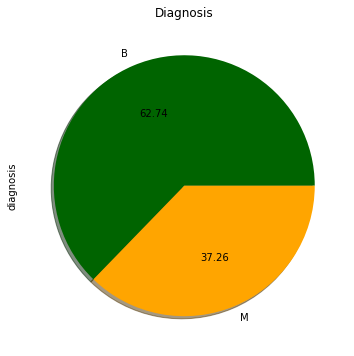

In [11]:
#Observing the Distubution of Sampled Cells in our Dataset
data.diagnosis.value_counts().plot(kind='pie',shadow=True,colors=('darkgreen','orange'),autopct='%.2f',figsize=(8,6))
plt.title('Diagnosis')
plt.show()

In [12]:
#we Tokenize the Values Associated to covert them to numerical features that we can classify
a = {'M':1,'B':0}
data['diagnosis'] = data['diagnosis'].replace(a)

In [13]:
#  produce a new column for each unique categorical value
data['diagnosis'] = pd.get_dummies(data['diagnosis'])

D:\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


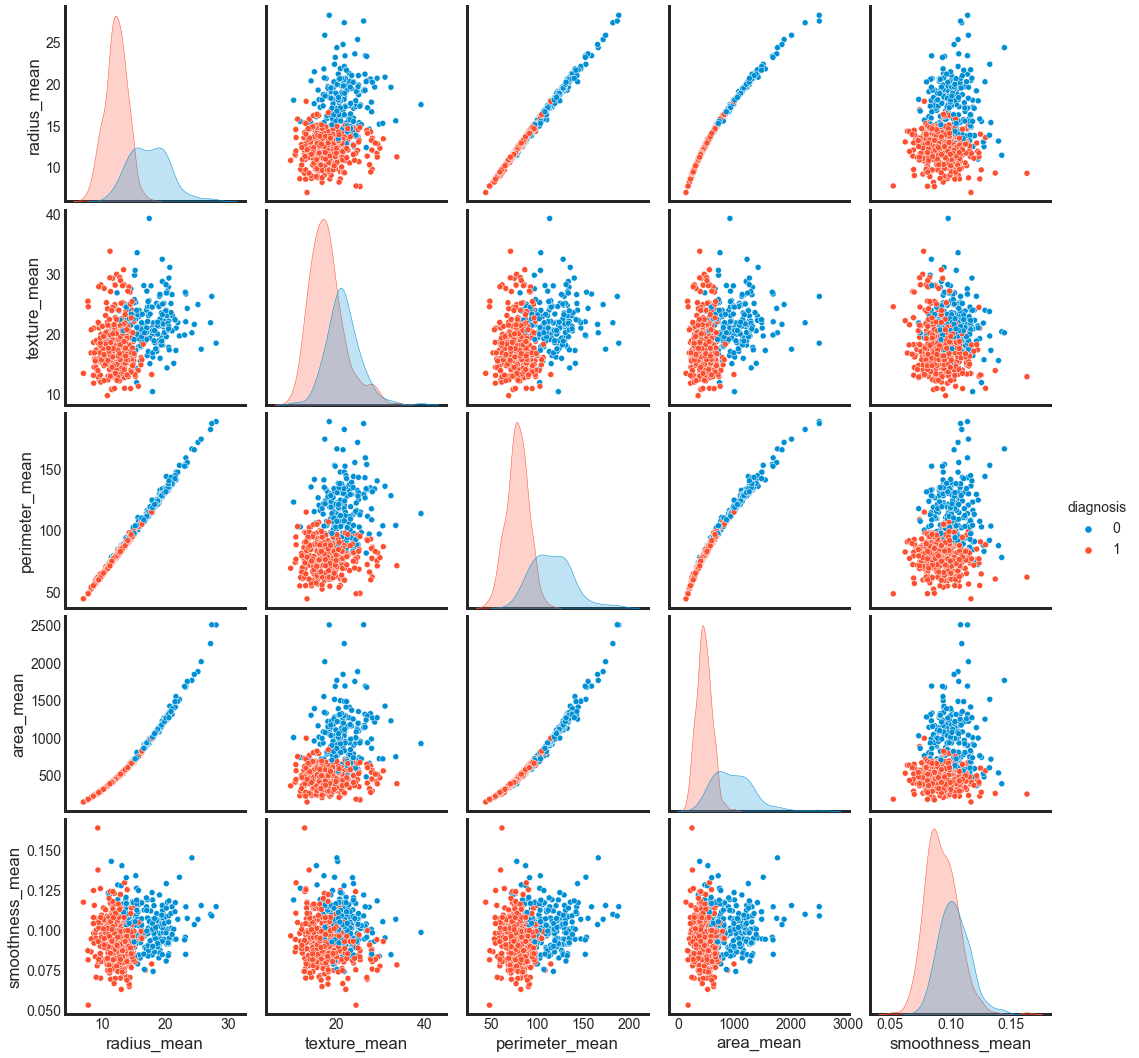

In [14]:
#Exploring Correlations between pairs of features to identify any redundent feautres 
plt.style.use('fivethirtyeight')
sns.set_style("white")
sns.pairplot(data[[data.columns[0], data.columns[1],data.columns[2],data.columns[3],
                     data.columns[4], data.columns[5]]], hue = 'diagnosis' , size=3)

#although very similar - the dataset does not show Strong redudency of features

In [15]:

X = data.drop(['diagnosis'],axis=1,inplace=False)
y = data.diagnosis

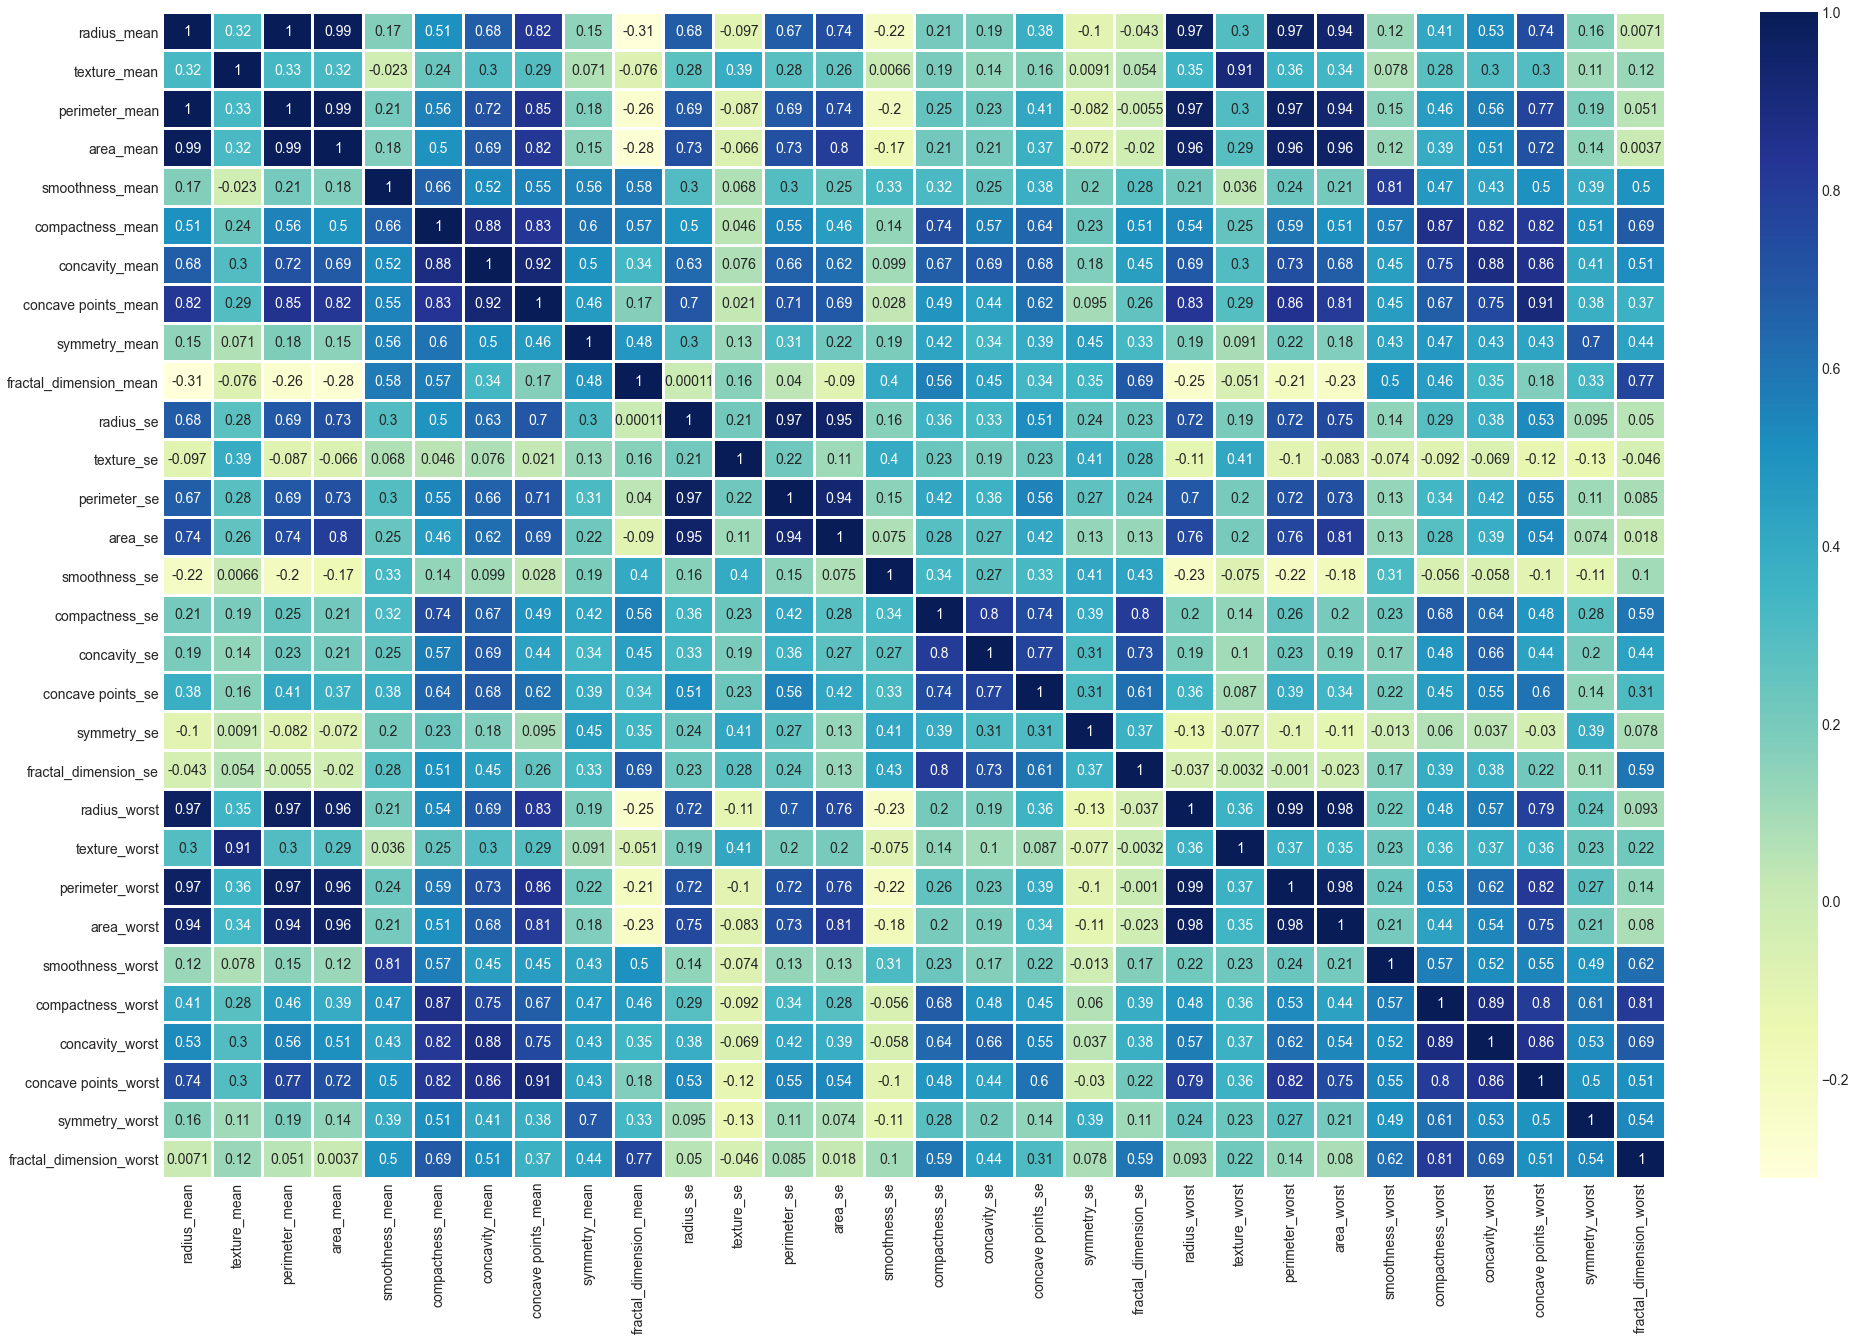

In [16]:
#We Drow a heat map to identify the features most correlating and how they infulence the Diagnoses
f,ax = plt.subplots(figsize=(30,20))
sns.heatmap(X.corr(),linewidths=2,cmap="YlGnBu", annot=True)
plt.show()

In [17]:
#We standardize the Data Set to Insure no feature size will scew the biased of our model
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X = scaler.fit_transform(X)

In [18]:
#We split our data Set into Testing and Training Portions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

***
## Model Training 
 For the Purpuse of comparison - i will be creating 4 model variations for comparison:
 
Logistic Regression
SVM
GaussianNB
DecisionTree Classifier	

In [19]:
#Training a Logical Regression Model
LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=33)
lr_pred = LogisticRegressionModel.fit(X_train,y_train).predict(X_test)






D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [20]:
#Training a SVC Model
SVCModel = SVC(kernel= 'rbf', max_iter=100,C=1.0,gamma='auto')
svm_pred=SVCModel.fit(X_train,y_train).predict(X_test)


D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


In [21]:
#Training a Gaussian Naive Bayes Model
GaussianNBModel = GaussianNB()
gnb_pred = GaussianNBModel.fit(X_train, y_train).predict(X_test)

In [22]:
# Training  a Decision Tree Model
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=33) 
dt_pred = DecisionTreeClassifierModel.fit(X_train, y_train).predict(X_test)

***
### Comparing the Model results

In [23]:
#Compiling the Model Results to compare Accuracy
models=['Logistic Regression','SVM','GaussianNB','DecisionTree Classifier']
preds=[lr_pred,svm_pred,gnb_pred,dt_pred]
acc=[]
for i in preds:
    accscore=accuracy_score(i,y_test).round(2)
    acc.append(accscore)

In [24]:
data=zip(models,acc)
result=pd.DataFrame(data,columns=['Model','Accuracy']).sort_values(["Accuracy"], ascending = False)

In [25]:
result

,Model,Accuracy
0,Logistic Regression,0.97
1,SVM,0.96
2,GaussianNB,0.93
3,DecisionTree Classifier,0.92


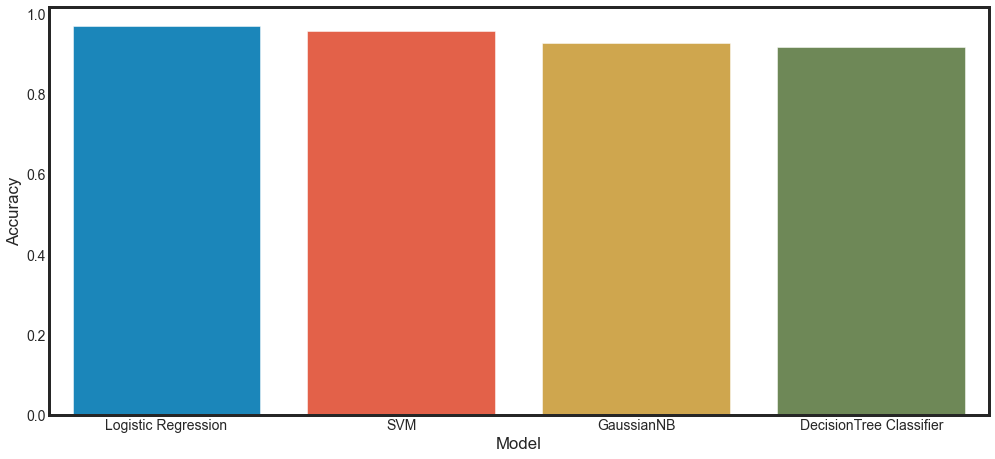

In [26]:
plt.figure(figsize=(15,7))
sns.barplot(x = "Model", y = "Accuracy", data = result)
plt.show()

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [28]:
#Definging a confusion Matrix to Indepth review Each 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.94      0.97      0.96        68
           1       0.98      0.97      0.97       120

    accuracy                           0.97       188
   macro avg       0.96      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188

Confusion matrix, without normalization
[[ 66   2]
 [  4 116]]


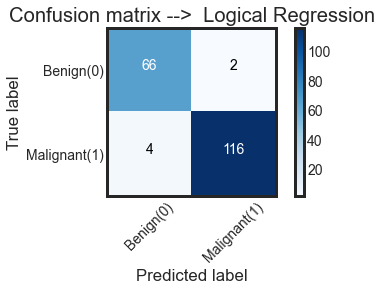

In [29]:
cnf_matrix_LR = confusion_matrix(y_test, lr_pred, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, lr_pred))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_LR, classes=['Benign(0)','Malignant(1)'],normalize= False,  title='Confusion matrix -->  Logical Regression')

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        68
           1       0.98      0.96      0.97       120

    accuracy                           0.96       188
   macro avg       0.96      0.96      0.96       188
weighted avg       0.96      0.96      0.96       188

Confusion matrix, without normalization
[[ 66   2]
 [  5 115]]


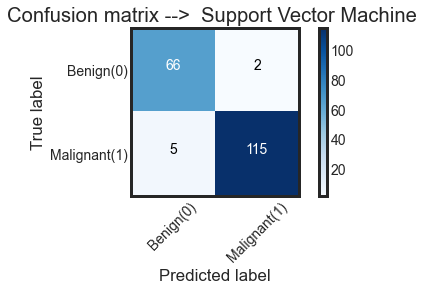

In [30]:
cnf_matrix_svm = confusion_matrix(y_test, svm_pred, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, svm_pred))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_svm, classes=['Benign(0)','Malignant(1)'],normalize= False,  title='Confusion matrix -->  Support Vector Machine ')

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        68
           1       0.96      0.93      0.95       120

    accuracy                           0.93       188
   macro avg       0.92      0.93      0.93       188
weighted avg       0.93      0.93      0.93       188

Confusion matrix, without normalization
[[ 63   5]
 [  8 112]]


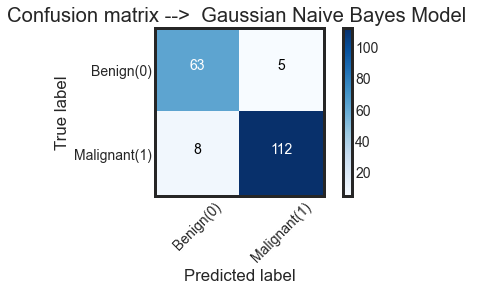

In [31]:
cnf_matrix_GNB = confusion_matrix(y_test, gnb_pred, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, gnb_pred))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_GNB, classes=['Benign(0)','Malignant(1)'],normalize= False,  title='Confusion matrix -->  Gaussian Naive Bayes Model ')

              precision    recall  f1-score   support

           0       0.91      0.87      0.89        68
           1       0.93      0.95      0.94       120

    accuracy                           0.92       188
   macro avg       0.92      0.91      0.91       188
weighted avg       0.92      0.92      0.92       188

Confusion matrix, without normalization
[[ 59   9]
 [  6 114]]


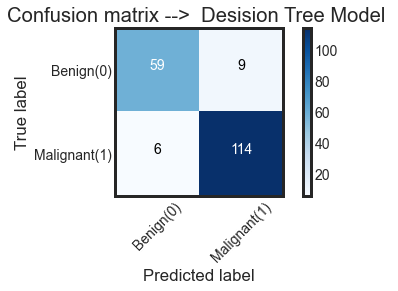

In [32]:
cnf_matrix_DT = confusion_matrix(y_test, dt_pred, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, dt_pred))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_DT, classes=['Benign(0)','Malignant(1)'],normalize= False,  title='Confusion matrix -->  Desision Tree Model ')

***
## Live Testing

In [33]:
TestingModelDatasvc =pd.DataFrame(testdata)
TestingModelDataDT = pd.DataFrame(testdata)
TestingModelDataG = pd.DataFrame(testdata)
TestingModelDataLR = pd.DataFrame(testdata) 
TestDataModel = [TestingModelDatasvc,TestingModelDataDT,TestingModelDataG, TestingModelDataLR ]

In [34]:
TestingModelDatasvc

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.990,10.38,122.80,1001.0,0.1184,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890
21,9.504,12.44,60.34,273.9,0.1024,0.06492,0.02956,0.02076,0.1815,0.06905,...,10.23,15.66,65.13,314.9,0.1324,0.1148,0.08867,0.06227,0.2450,0.07773


In [35]:
TestingModelDatasvc = SVCModel.fit(X_train,y_train).predict(TestingModelDatasvc)
TestingModelDatasvc

D:\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


array([0, 0], dtype=uint8)

In [36]:
TestDatapredictionGM = GaussianNBModel.fit(X_train, y_train).predict(TestingModelDataG)
TestDatapredictionGM

array([0, 0], dtype=uint8)

In [37]:
TestDatapredictionLR =  LogisticRegressionModel.fit(X_train,y_train).predict(TestingModelDataLR)
TestDatapredictionLR


D:\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


array([0, 0], dtype=uint8)

In [38]:
TestDatapredictionDT = DecisionTreeClassifierModel.fit(X_train, y_train).predict(TestingModelDataDT)
TestDatapredictionDT

array([0, 0], dtype=uint8)